## **<font color='cyan'>Machine Learning HW-7</font>**
## **<font color='cyan'>Group 3</font>**

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')
rand_state=1000

In [72]:
#import data and see what we're working with

In [73]:
df_bikeshare_csv = pd.read_csv("bikeshare.csv")
df_bikeshare_csv.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1


In [74]:
#A couple of the data points might be categorical lets check!

In [75]:
df_bikeshare_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [76]:
#After looking at the variables, were treating weekday, weathersit, and season as numerical vaiables even though they are catagorical in nature, we should make these dummys before moving on. 

In [77]:
df = pd.get_dummies(df_bikeshare_csv, columns=["season","weekday","weathersit"])

In [78]:
df.head()

,yr,mnth,hr,holiday,notbizday,temp,hum,windspeed,dteday,cnt,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,1,0,0,1,-1.334609,0.947345,-1.553844,2011-01-01,16,...,0,0,0,0,0,1,1,0,0,0
1,0,1,1,0,1,-1.438475,0.895513,-1.553844,2011-01-01,40,...,0,0,0,0,0,1,1,0,0,0
2,0,1,2,0,1,-1.438475,0.895513,-1.553844,2011-01-01,32,...,0,0,0,0,0,1,1,0,0,0
3,0,1,3,0,1,-1.334609,0.636351,-1.553844,2011-01-01,13,...,0,0,0,0,0,1,1,0,0,0
4,0,1,4,0,1,-1.334609,0.636351,-1.553844,2011-01-01,1,...,0,0,0,0,0,1,1,0,0,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            17379 non-null  int64  
 1   mnth          17379 non-null  int64  
 2   hr            17379 non-null  int64  
 3   holiday       17379 non-null  int64  
 4   notbizday     17379 non-null  int64  
 5   temp          17379 non-null  float64
 6   hum           17379 non-null  float64
 7   windspeed     17379 non-null  float64
 8   dteday        17379 non-null  object 
 9   cnt           17379 non-null  int64  
 10  season_1      17379 non-null  uint8  
 11  season_2      17379 non-null  uint8  
 12  season_3      17379 non-null  uint8  
 13  season_4      17379 non-null  uint8  
 14  weekday_0     17379 non-null  uint8  
 15  weekday_1     17379 non-null  uint8  
 16  weekday_2     17379 non-null  uint8  
 17  weekday_3     17379 non-null  uint8  
 18  weekday_4     17379 non-nu

In [80]:
#looks much better!

## **<font color='cyan'>Part 1.1</font>**

In [81]:
#first let's drop dteday, since we'll be looking at each observation on it's own

In [82]:
df_bikeshare_csv.drop('dteday', axis=1, inplace=True)

In [83]:
#now we'll define our target varialbe and feature space and split the data into 80% training and 20% testing

In [84]:
y = df_bikeshare_csv['cnt']
X = df_bikeshare_csv.drop('cnt', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

## **<font color='cyan'>Part 1.2</font>**

In [85]:
#importing the relevant sklean package

In [86]:
from sklearn.neighbors import KNeighborsRegressor

In [87]:
#training the module using the training set and the default features

In [90]:
KNN_regression = KNeighborsRegressor()
KNN_regression.fit(X_train, y_train)

KNeighborsRegressor()

In [91]:
X_train.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed
2136,2,0,4,21,0,0,1,2,-0.399817,-0.970450,0.276298
5466,3,0,8,16,0,6,1,1,1.573634,-0.866786,0.031898
8770,1,1,1,6,0,5,0,2,-1.438475,0.532687,-0.699669
14674,3,1,9,15,0,6,1,3,0.327244,1.310171,0.519881
15708,4,1,10,17,0,0,1,1,0.119512,-1.229612,0.519881


In [92]:
# Looks like we have 5 rows, so lets fit our KNN to the training set

In [93]:
KNN_regression = KNeighborsRegressor(n_neighbors=5)
KNN_regression.fit(X_train, y_train)

KNeighborsRegressor()

In [94]:
#saving the predictions as y_hat

In [95]:
y_hat = KNN_regression.predict(X_test)

In [96]:
#let's save the predictions in a df

In [97]:
df_predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
df_predictions.head()

,y_test,y_hat
4495,26,37.8
4418,47,58.6
7141,11,13.2
14765,205,217.6
16541,65,85.8


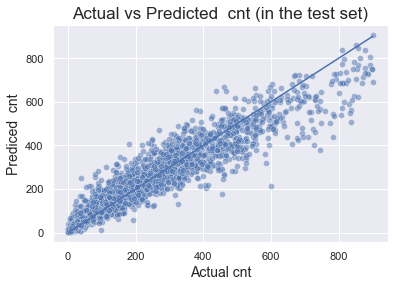

In [98]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.5)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual cnt', fontsize=14)
plt.ylabel('Prediced  cnt', fontsize=14)
plt.title('Actual vs Predicted  cnt (in the test set)', fontsize=17)
plt.show()

In [99]:
#visually this model looks good until actual cnt reaches the 500 level. After that point the model seems to do a bad job of capturing the pattern in the count of rented bikes.

In [100]:
#let's calculate the RMSE in the test set for this KNN model

In [101]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
MSE_test

3247.38

In [102]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

56.99

## **<font color='cyan'>Part 1.3</font>**

In [103]:
#let's see what the estimated RMSE_test is

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
NMSE = cross_val_score(estimator = KNN_regression, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [106]:
MSE_CV = round(np.mean(-NMSE),4)
MSE_CV

3713.1853

In [107]:
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

60.9359

In [108]:
#!!!!!!!!!!!!!!!# isn't this RMSE really bad?




#this model just ran using the default settings - let's see what the optimol value for K is

In [109]:
RMSE_CV=[]
RMSE_test = []

k=40

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(y_test - KNN_i.predict(X_test)))))
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 'RMSE_test':np.round(RMSE_test,2)}, index=range(1,k))

In [110]:
optimal_k.head(10)

,RMSE_CV,RMSE_test
1,87.16,84.55
2,66.96,64.91
3,61.59,58.36
4,59.97,57.76
5,59.83,56.99
6,59.86,57.16
7,60.49,57.46
8,60.79,57.71
9,61.43,57.77
10,62.24,58.11


In [111]:
#according to the output above, the optimal value of K is the default (5). This is where RMSE_test is the best/lowest.

## **<font color='cyan'>Part 2.1</font>**

In [170]:
df_bikeshare_csv.loc[:, 'overload'] = np.where(df_bikeshare_csv.cnt>500, 1, 0)

In [171]:
df_bikeshare_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
 12  overload    17379 non-null  int32  
dtypes: float64(3), int32(1), int64(9)
memory usage: 1.7 MB


In [172]:
pd.crosstab(df_bikeshare_csv['overload'],df_bikeshare_csv['overload'], normalize='all')*100

overload,0,1
overload,,
0,92.640543,0.000000
1,0.000000,7.359457


In [173]:
#the target variable, overload, is very imbalanced

## **<font color='cyan'>Part 2.2</font>**

In [174]:
y = df_bikeshare_csv['overload']
X = df_bikeshare_csv.drop('overload', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

## **<font color='cyan'>Part 2.3</font>**

In [175]:
 from sklearn.neighbors import KNeighborsClassifier

In [177]:
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [178]:
y_hat      = KNN_classifier.predict(X_test)
y_hat_probs = KNN_classifier.predict_proba(X_test)[:,1] 

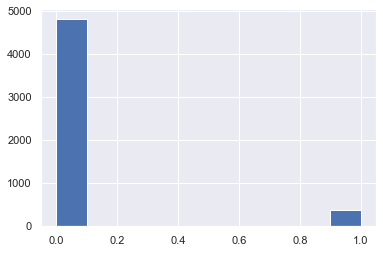

In [179]:
plt.hist(y_hat_probs)
plt.show()

In [180]:
y_hat_30 = np.where(y_hat_probs>0.3,1,0)
y_hat_70 = np.where(y_hat_probs>0.7,1,0)

In [182]:
#if we want to avoid false negatives, we should use the lower threshold. This will capture more true positives that the model predicts are less likely to be positive. However, this increase in true positives results in lower precision in the model. 

In [183]:
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_30':y_hat_30, 'y_hat_70':y_hat_70})
df_predictions.head()

,y_test,y_hat_probs,y_hat_30,y_hat_70
4495,0,0.0,0,0
4418,0,0.0,0,0
7141,0,0.0,0,0
14765,0,0.0,0,0
16541,0,0.0,0,0


## **<font color='cyan'>Part 2.4</font>**

In [185]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [186]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



def my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5):
    knn= KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    probs = knn.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled
 

In [187]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5)

-----------------------------------------
Accuracy  = 1.0
Error_rate  = 0.0
Precision = 1.0
Recall    = 1.0
f1_score  = 1.0
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4819,0
Actual : positive,0,395


In [190]:
#We should not trust the accuracy of the model - the data for overload is highly imbalanced.

In [192]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.3)

-----------------------------------------
Accuracy  = 0.9996
Error_rate  = 0.0004
Precision = 0.99
Recall    = 1.0
f1_score  = 1.0
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4817,2
Actual : positive,0,395


In [193]:
#This model has lower accuracy and precision rates, but it is somewhat consistent to our prediction in 4.4. The lower threshold is generating more false positives.

## **<font color='cyan'>Part 2.5</font>**

No Skill: ROC AUC=0.500
KNN: ROC AUC=1.000


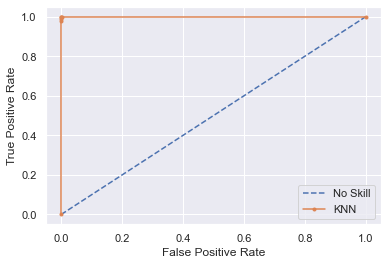

In [194]:
# generate a no skill (ns) prediction and KNN  (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = KNN_classifier.predict_proba(X_test)[:,1]
# calculating scores for no skill and KNN 
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [195]:
#This model is doing a perfect job - much better than the no skill prediction.

## **<font color='cyan'>Part 2.6</font>**

In [196]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [197]:
accuracy = cross_val_score(estimator = KNN_classifier, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [198]:
1-accuracy

array([0.00041102, 0.00041102, 0.        , 0.00164406, 0.        ])

In [199]:
error_rate_cv=round((1-accuracy).mean(),4)
error_rate_cv

0.0005

In [205]:
error_rate_cv = []
k=50

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    error_rate_cv.append(np.mean(y_test != KNN_i.predict(X_test)) )

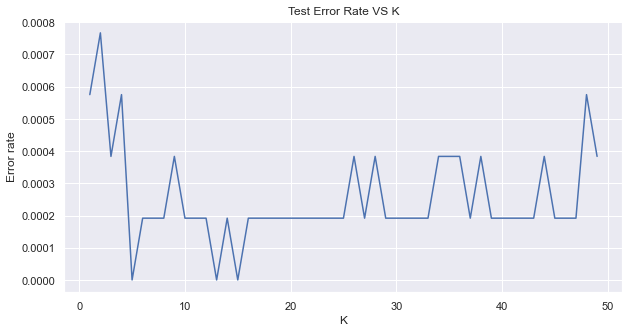

In [206]:
plt.figure(figsize=(10,5))
sns.lineplot(y=error_rate_cv, x=range(1,k))
plt.title('Test Error Rate VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [207]:
error_rate_cv = []
k=20

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    error_rate_cv.append(np.mean(y_test != KNN_i.predict(X_test)) )

In [209]:
#the optimal value for K, according to the above results, is 5

## **<font color='cyan'>Part 2.7</font>**

In [210]:
#From the question, we know that we want our model to avoid false negatives.That is to say that it would be better to have an idle bike around than to have an unexpected overload.
#Thus, we would want to use the threshold of 0.3. This threshold will predict some overloads that won't actually happen, resulting in some extra cost from idle bikes, but that is better than having unexpected overloads. 